In [74]:
# General Libraries 

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
%matplotlib inline

# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

### Load the dataset

In [75]:
train= pd.read_csv("train.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
test_data = pd.read_csv("test.csv")

### EDA 

TRAINING DATA

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Numerical features are; Item_weight, Item_visibility, item_MRP(maximum retail price), Outlet_Establishment_year and Item_outlet_sales(sales made in a particular store for a product).

- Categorical features are; Item_Identifier, Item_Fat_Content, Item_type, Outlet_Identifier(unique store ID), Outlet_size, Outlet_Location_Type and Outlet_type.

In [78]:
### Gives us the number of rows and columns
train.shape

(8523, 12)

 In the train dataset we have 12 features and 8523 observations

In [79]:
## Descriptive statistics
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [80]:
# Check how many types of items are there and their distribution
train.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: xlabel='Item_Type'>

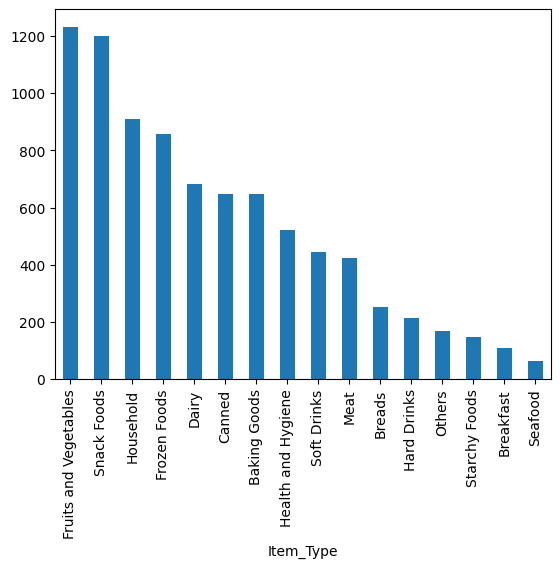

In [81]:
# Visualize the distribution of the different item types
train.Item_Type.value_counts().plot(kind='bar')

In [82]:
train['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [83]:
### Check for duplicates
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [84]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [85]:
# Checking for missing values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Test data

In [86]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [87]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


we have missing values in the Item_weight feature and Outlet_size feature.

In [88]:
test_data.shape

(5681, 11)

Our testing dataset has 11 features and 5681 different items/observations

### Univariate Analysis

- This focuses solely on describing and summarizing the distribution of the single variable.
- Visualize using histograms, boxplots, distribution plots, Kde plots and violin plots.

In [89]:
# Numerical columns 
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

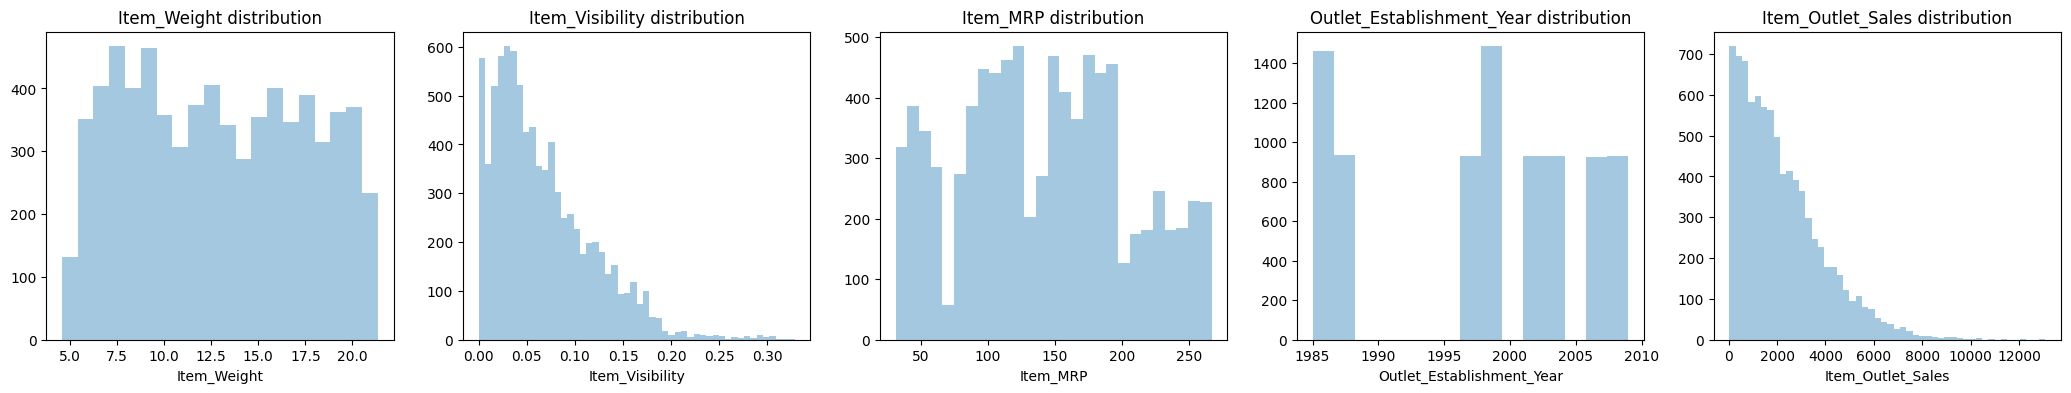

In [90]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.distplot(train[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

. Observations:
- Most Items weigh between 5kg and 20kg Item_Weight.
- Item_Visibility feature and Item_Outlet_sales feature are both right skewed.
- Most items retail prices range between 100 MRP - 190 MRP in the Item_MRP feature.
- A lot of stores were established in the years 1985 and 1998, while between 1988 to 1996 there were no stores established.

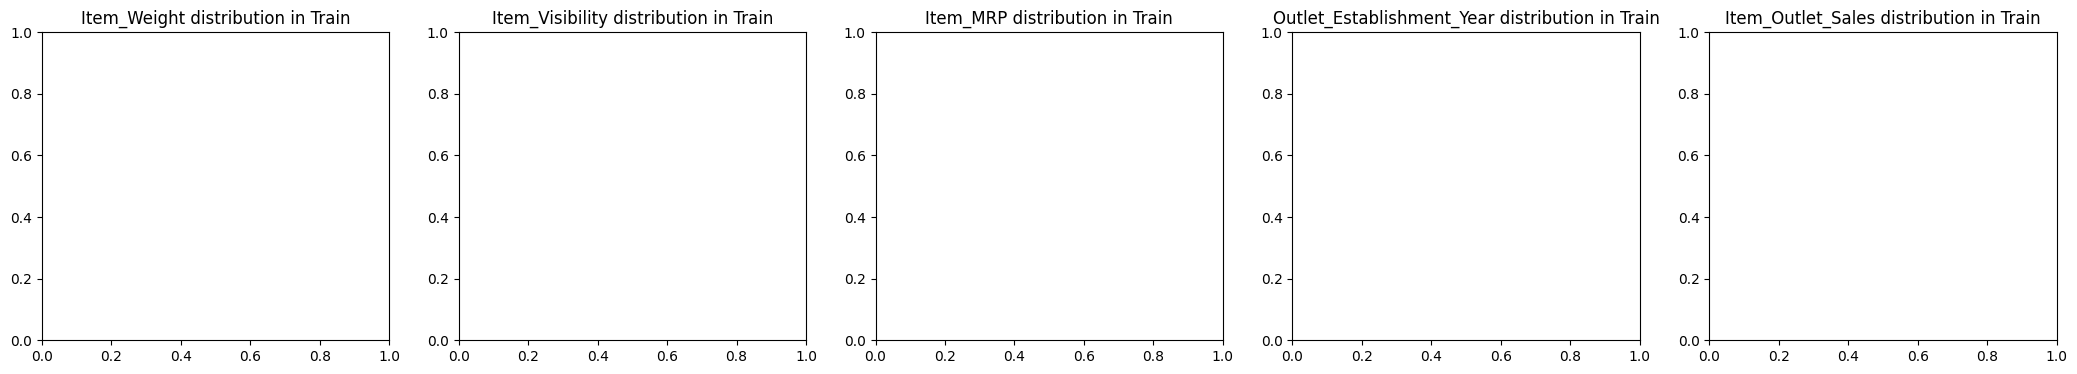

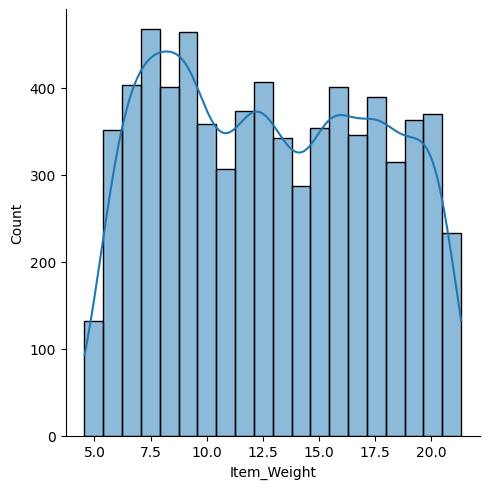

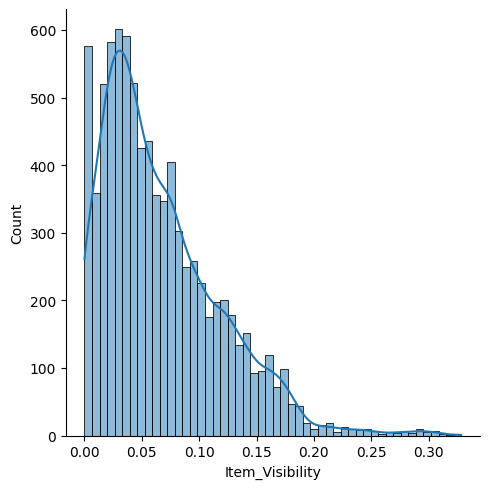

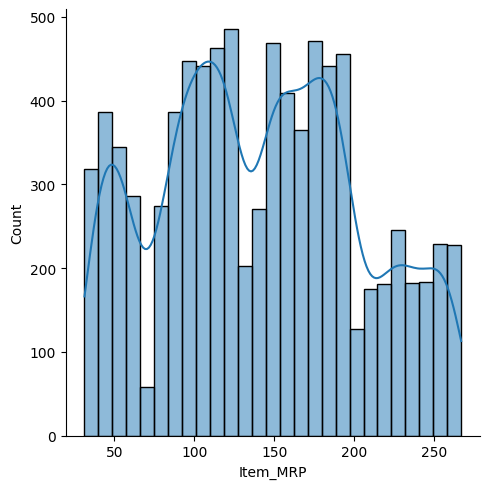

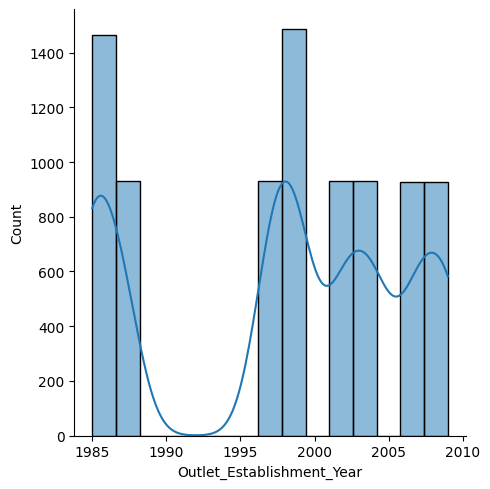

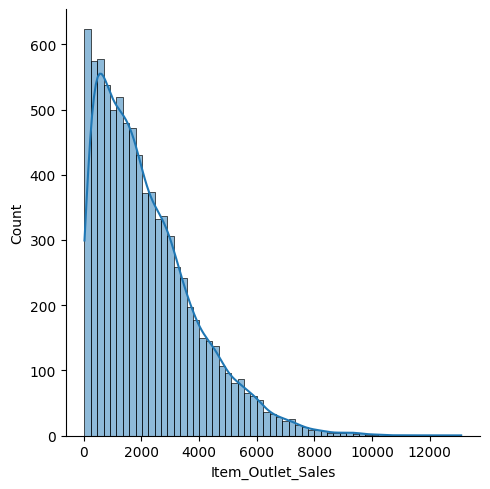

In [96]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(numeric_cols):
    sns.displot(train[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Train')

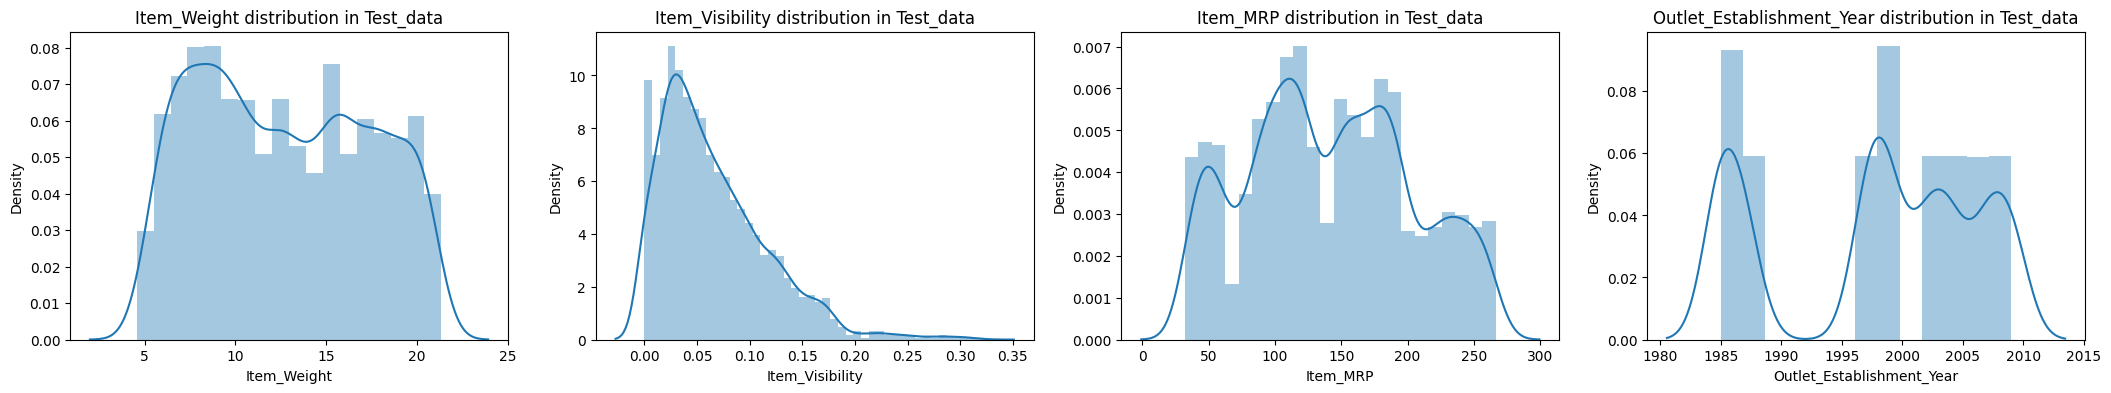

In [95]:
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']):
    sns.distplot(test_data[col], kde=True, ax=ax[index])
    ax[index].set_title(f'{col} distribution in Test_data')

Observations
- Both train and test datasets have almost similar distribution.

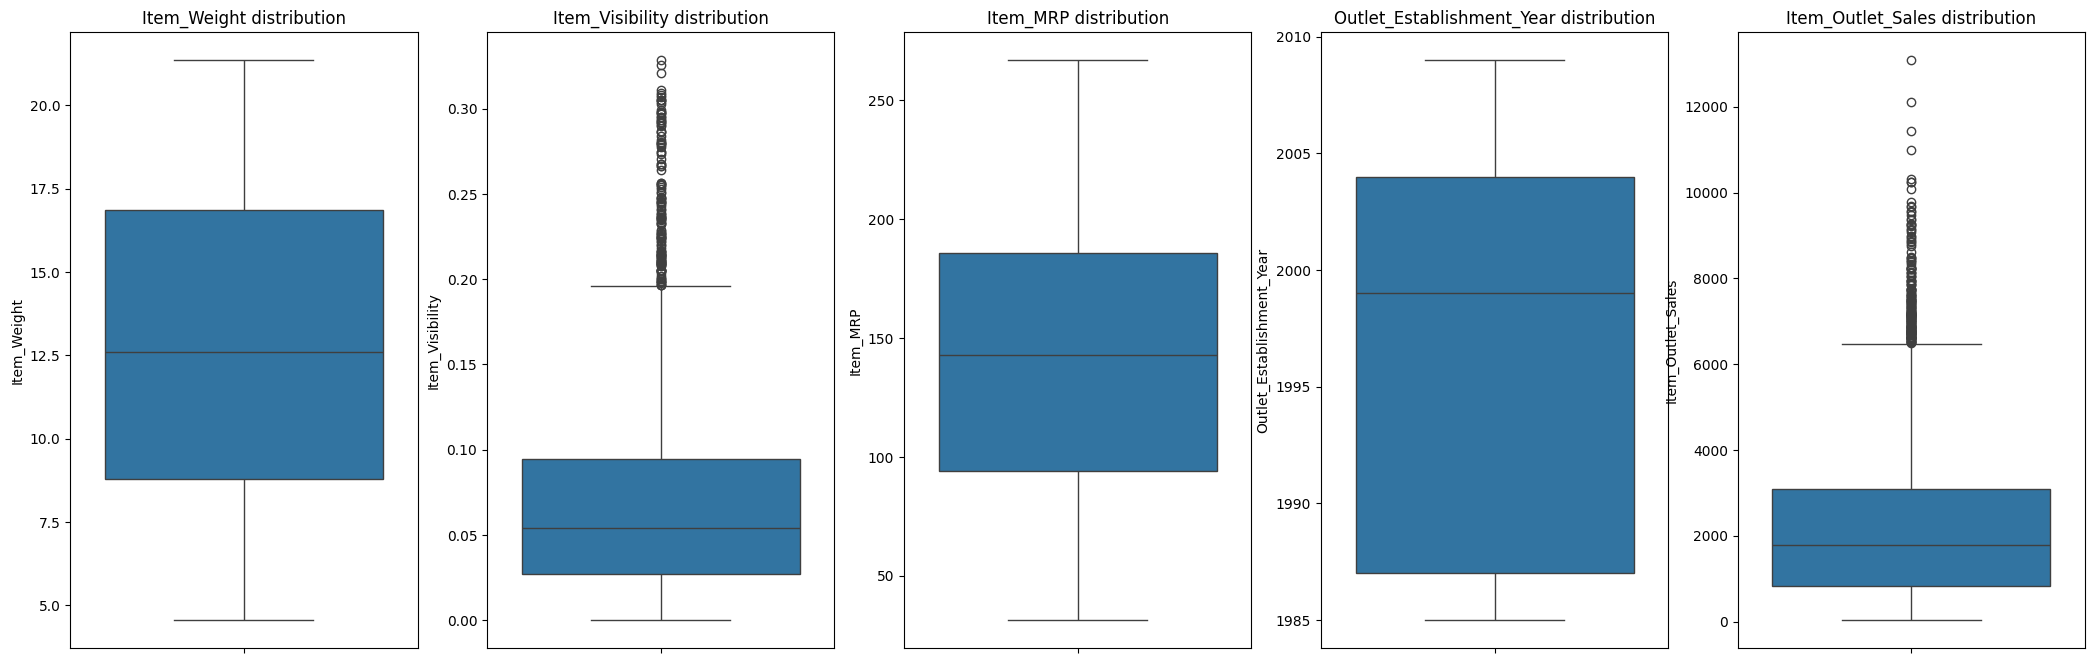

In [94]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

- No outliers detected in the features: Item_Weight, Item_MRP and Outlet_Establishment_Year.
- However in the features Item_visibility and Item_Outlet_sales features there are some outliers detected.

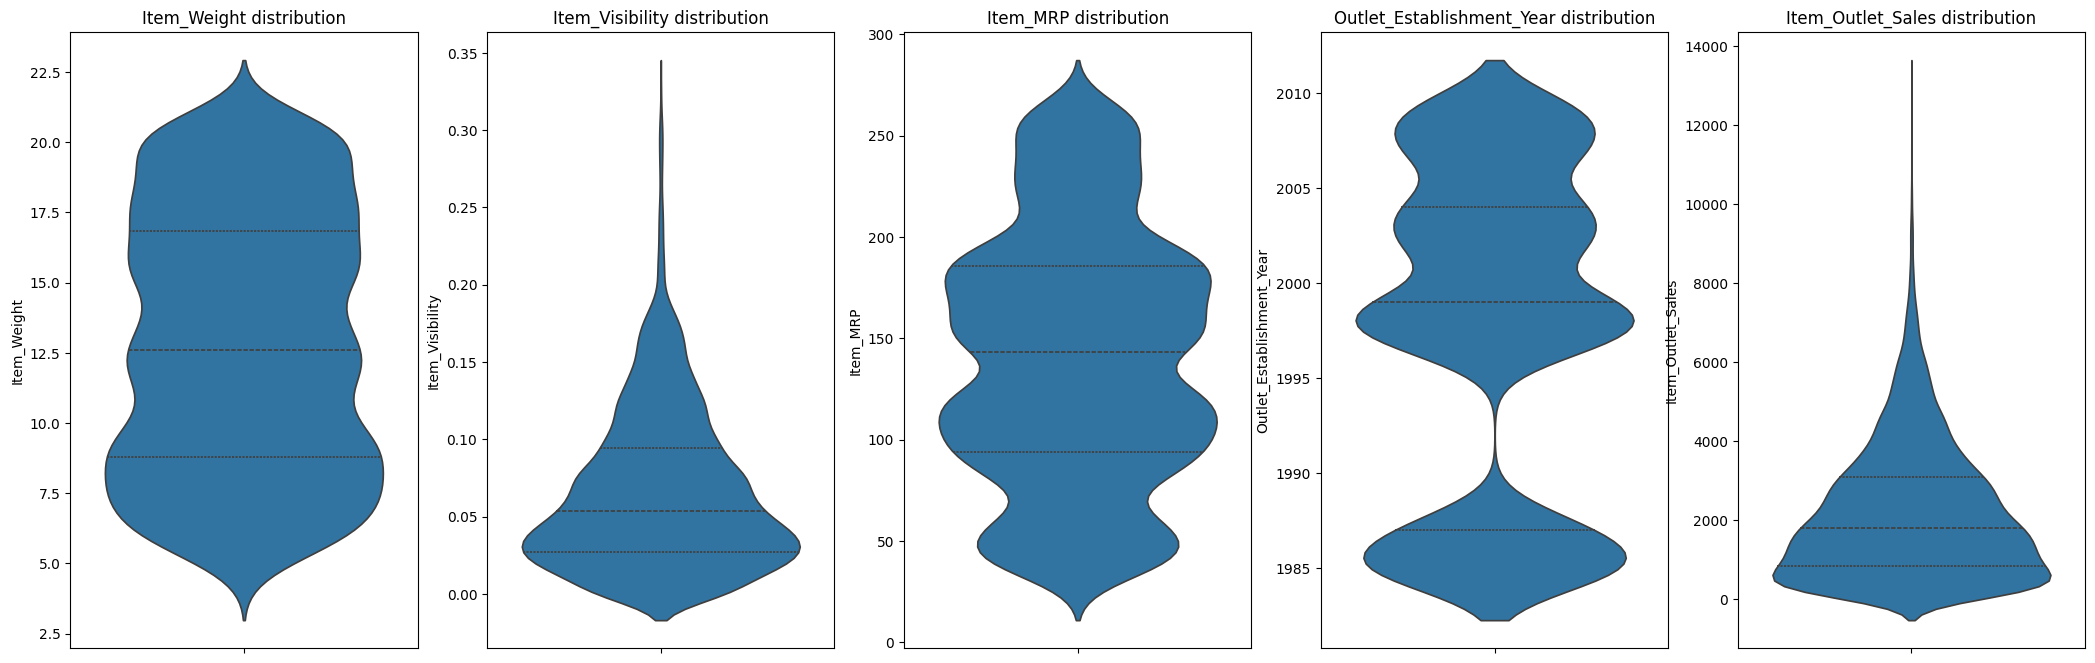

In [97]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.violinplot(data=train, y=col, ax=ax[index], inner='quartile')
    ax[index].set_title(f'{col} distribution')

- This violin plots confirm the outliers detected in the features names above i.e Item_Visibility and Item_Outlet_sales.

In [100]:
# Categorcal columns 
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [103]:
categorical_cols_to_display = [ 
                                 'Item_Fat_Content',
                                 'Item_Type',
                                 'Outlet_Size',
                                 'Outlet_Location_Type',
                                 'Outlet_Type'
                                ]
for col in categorical_cols_to_display:
    print(f"Number of values in the {col} column is:\n{train[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
------------

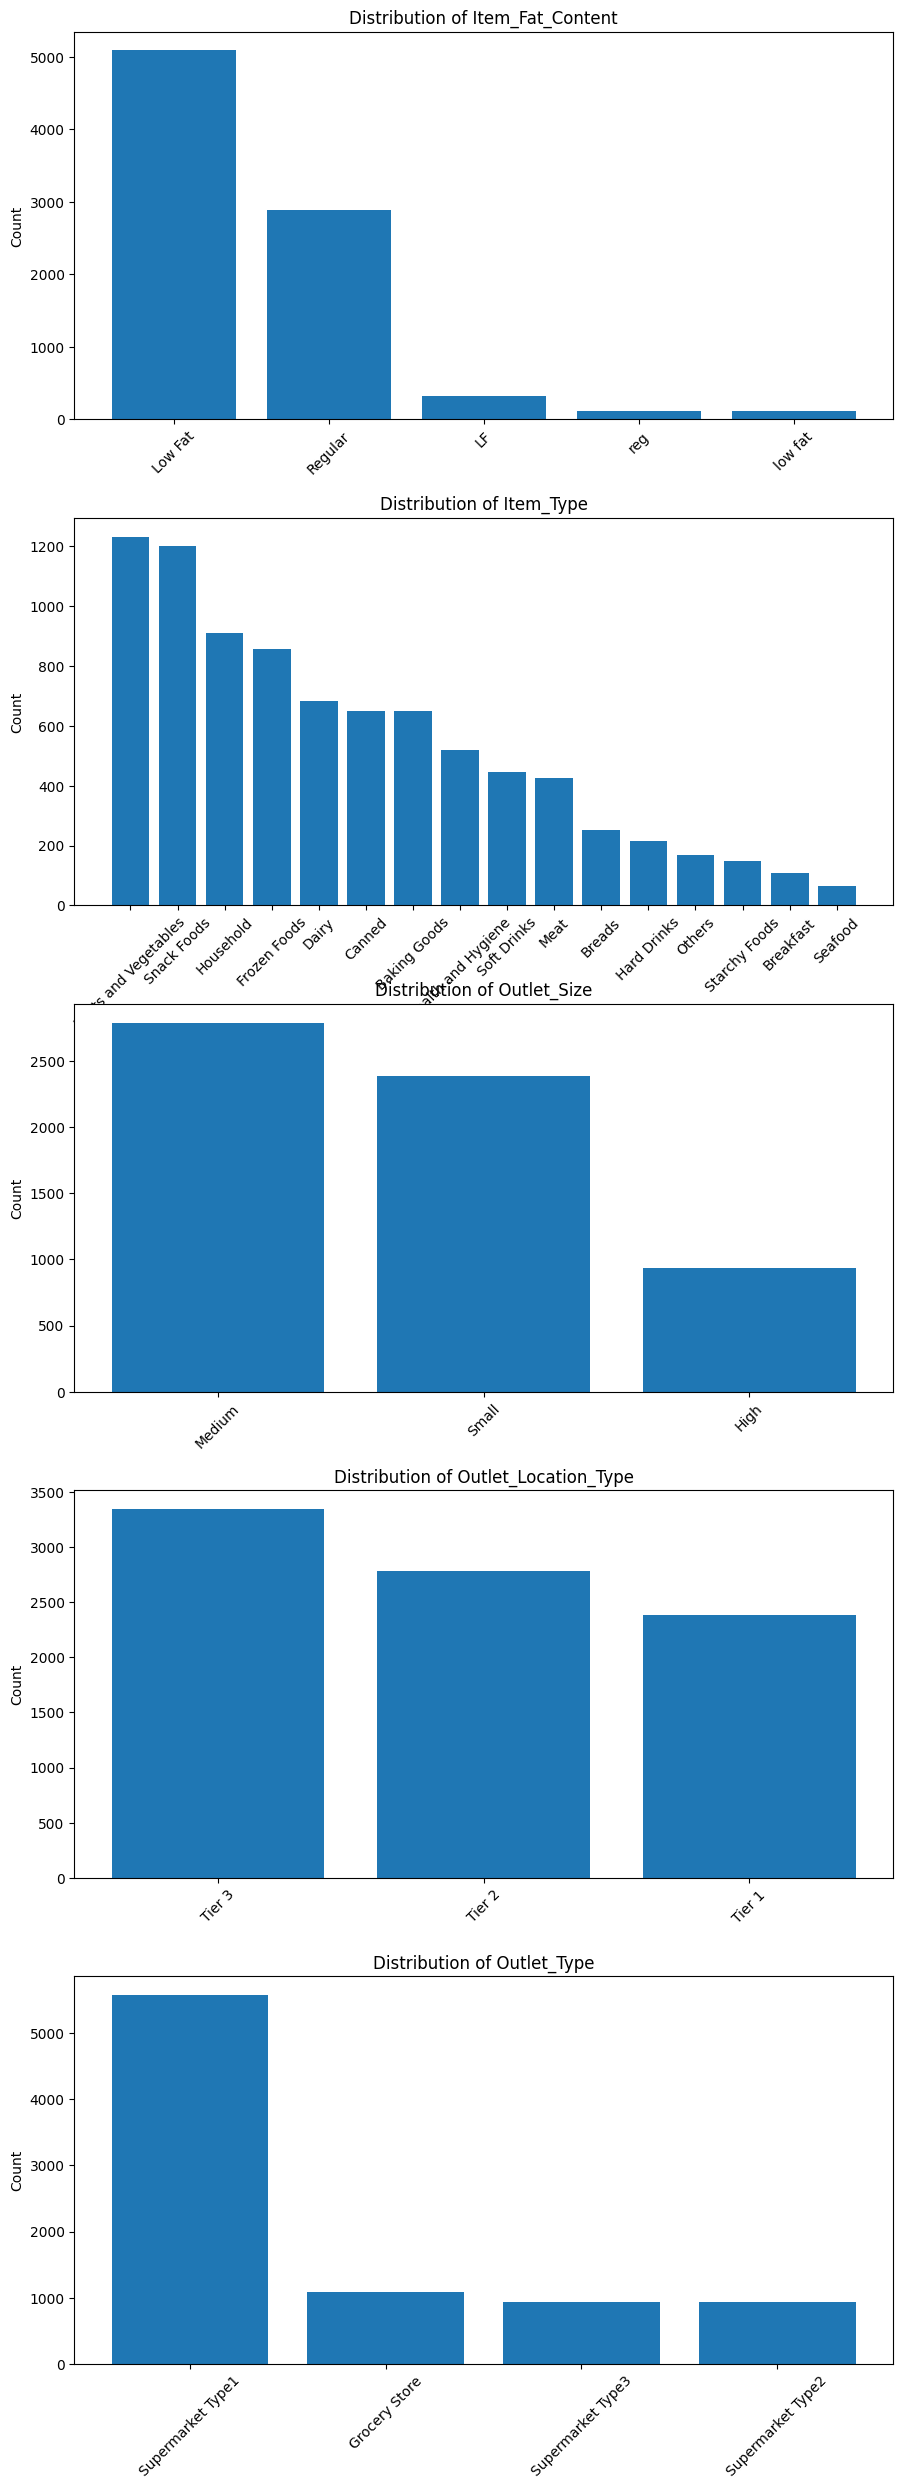

In [104]:
# Visualize the distributions
fig, axs = plt.subplots(len(categorical_cols_to_display), 1, figsize=(10, 5*len(categorical_cols_to_display)))
fig.tight_layout(pad=5.0)

for i, col in enumerate(categorical_cols_to_display):
    value_counts = train[col].value_counts()
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)

plt.show()

Observations
- In the Item_Fat_Content column there are entry errors i.e 'low fat', 'Low Fat' and LF are the same and should be in the smae category as well as 'Regular' and 'reg'
- In the Item_type feature there are different categories and we should consider regrouping to reduce the categories.

### Bivariate Analysis

In [108]:
#numerical
target = 'Item_Outlet_Sales'

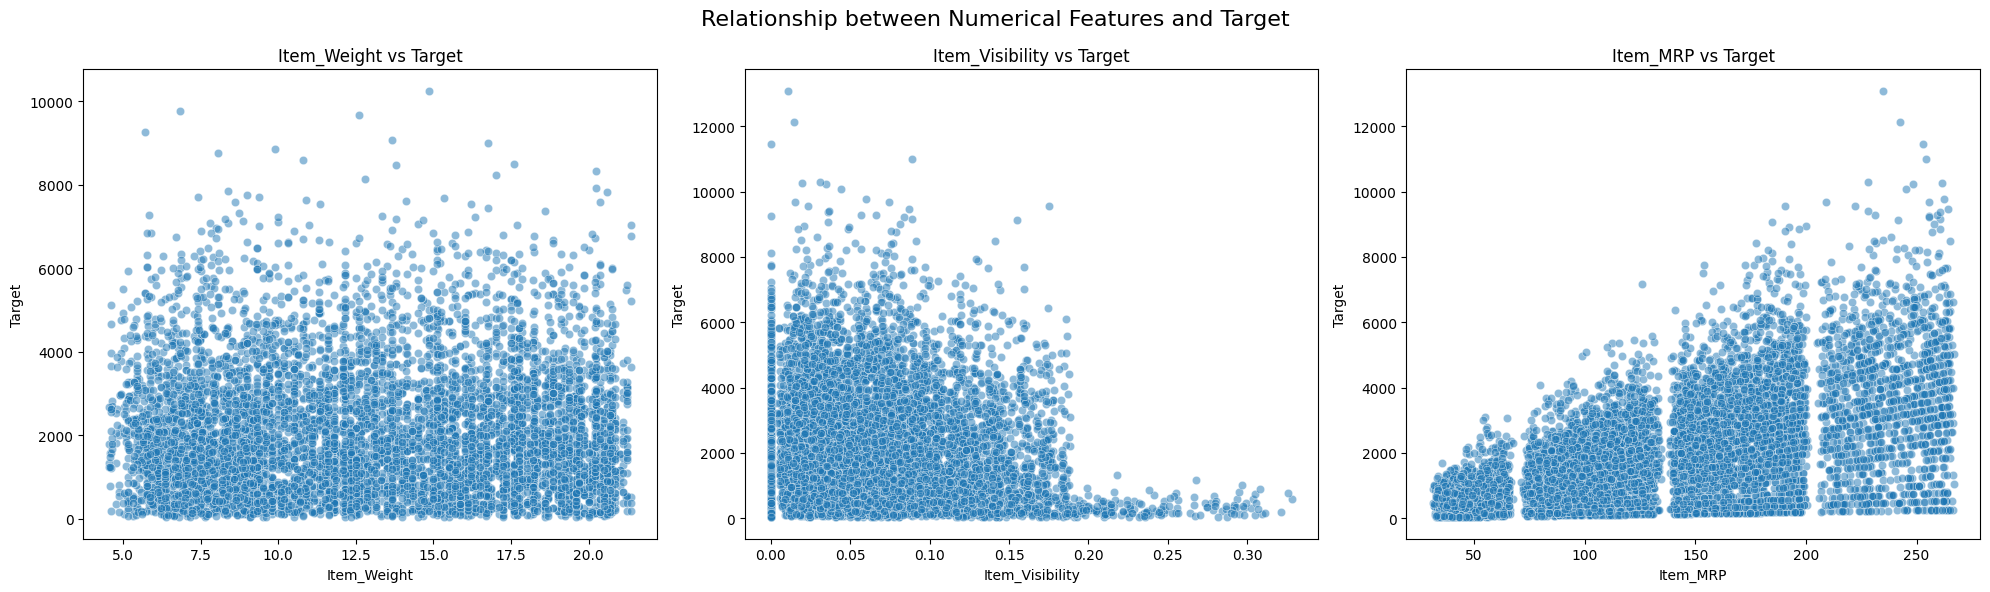

In [109]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Relationship between Numerical Features and Target', fontsize=16)

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train, x=col, y=target, ax=ax[index], alpha=0.5)
    ax[index].set_title(f'{col} vs Target')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel('Target')

plt.tight_layout()
plt.show()

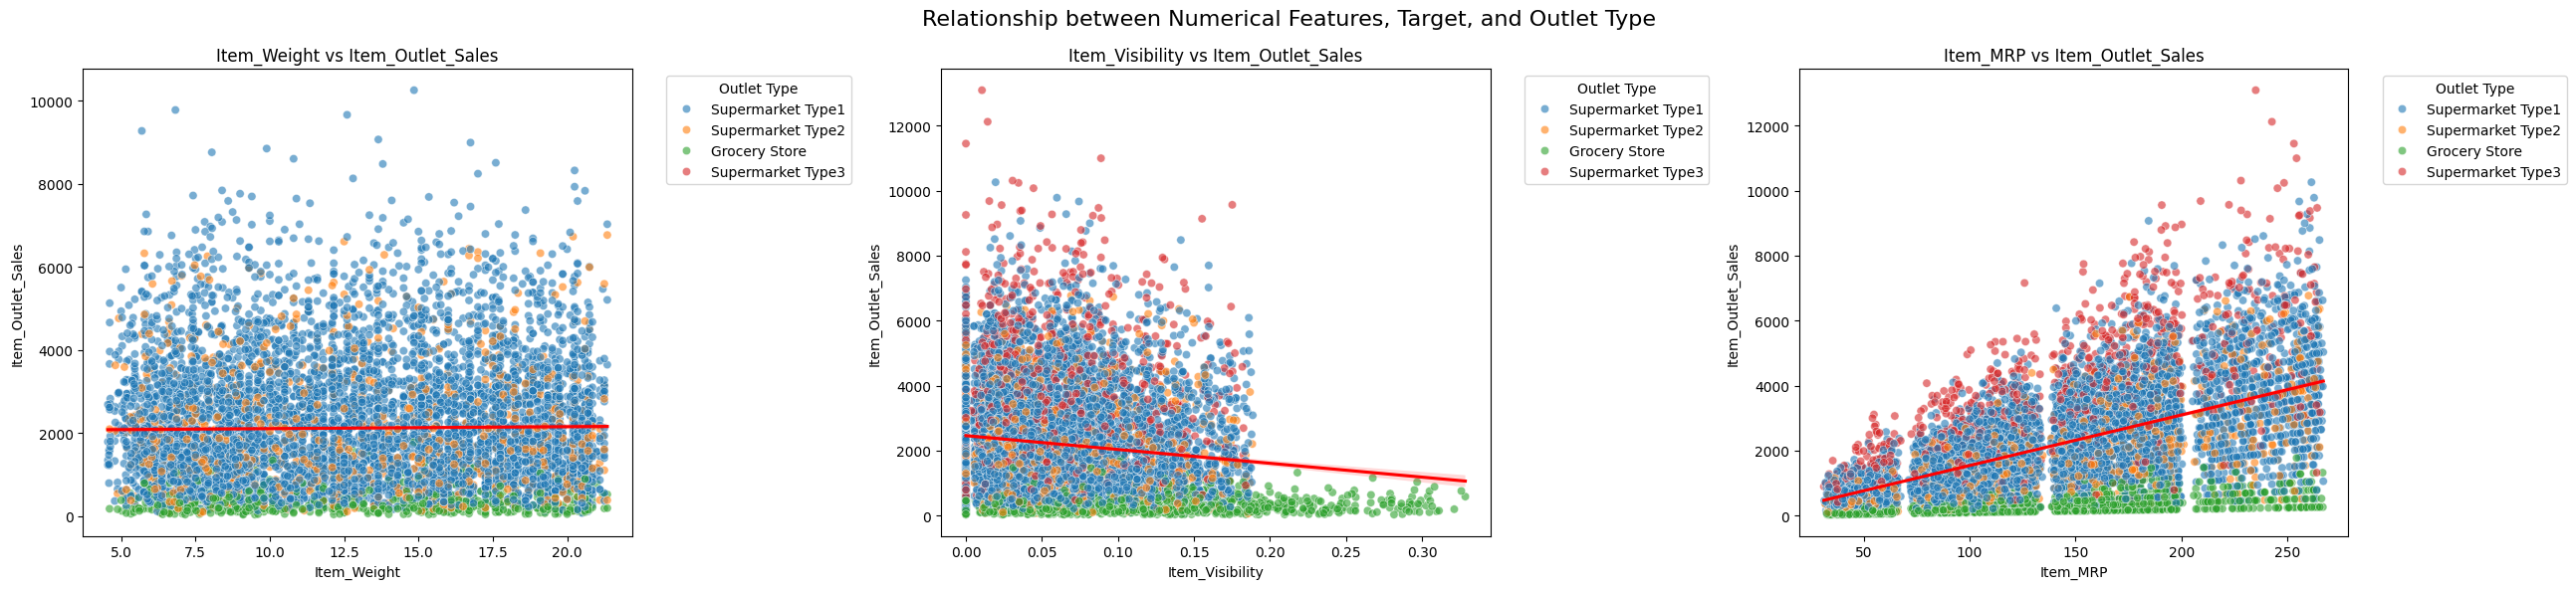

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 6))
fig.suptitle('Relationship between Numerical Features, Target, and Outlet Type', fontsize=16)

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train, x=col, y=target, ax=ax[index], hue='Outlet_Type', alpha=0.6)
    ax[index].set_title(f'{col} vs {target}')
    ax[index].set_xlabel(col)
    ax[index].set_ylabel(target)
    
    # Improve legend
    ax[index].legend(title='Outlet Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add a trend line
    sns.regplot(data=train, x=col, y=target, ax=ax[index], scatter=False, color='red')

plt.tight_layout()
plt.show()

In [113]:
numeric_columns = train.select_dtypes(include=[np.number]).columns
numeric_data = train[numeric_columns]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

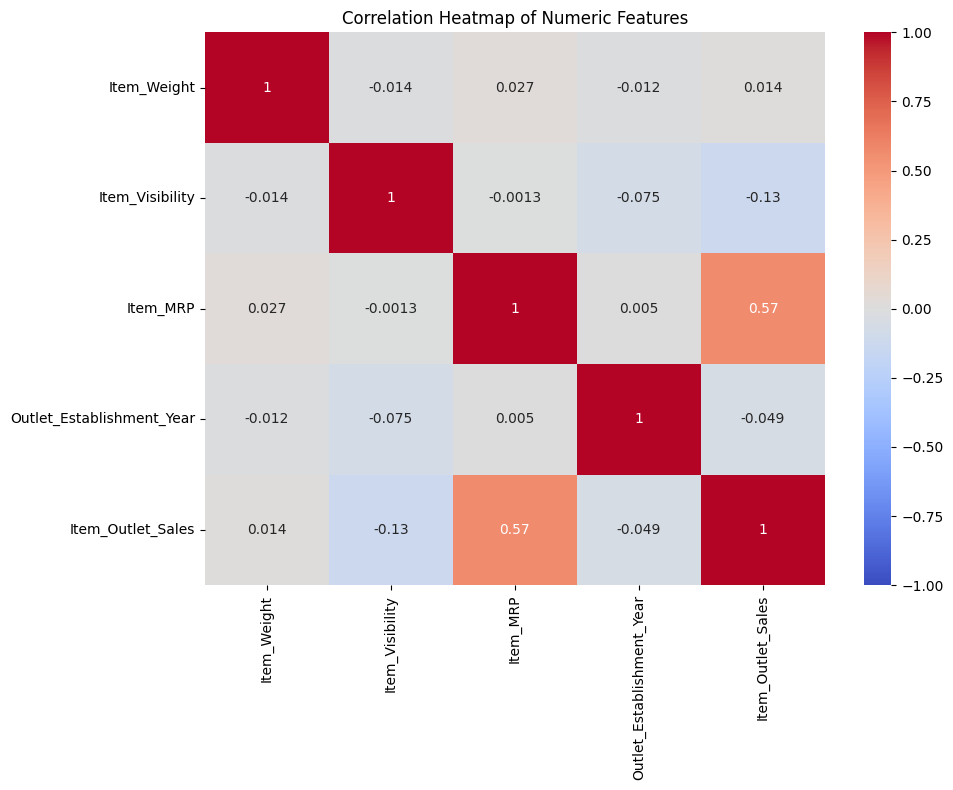

In [130]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

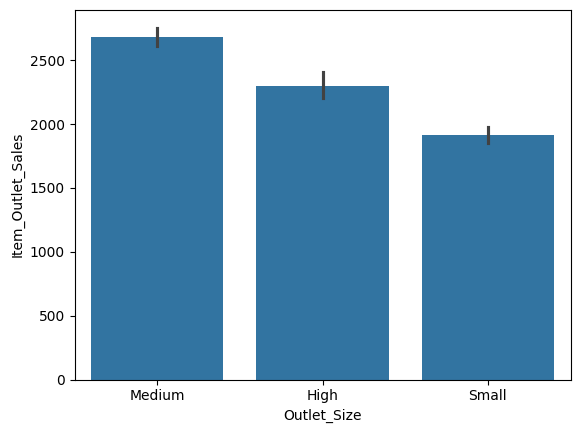

In [124]:
#Numerical-Categorical
sns.barplot(data=train, x='Outlet_Size', y=target)

In [127]:
train.Outlet_Establishment_Year

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

### Handling Missing Values

- Item_weight feature is a numerical variable and has no outliers hence we can replace the missing values using mean.
- Outlet_size feature is a categorical variable hence we shall use mode to handle missing values.

In [132]:
# for train
train['Outlet_Size'] = train.Outlet_Size.fillna(train.Outlet_Size.dropna().mode()[0]) #replace by the median after
train['Item_Weight'] = train.Item_Weight.fillna(train.Item_Weight.mean())

# for test
test_data['Outlet_Size'] = test_data.Outlet_Size.fillna(test_data.Outlet_Size.dropna().mode()[0]) #replace by the median after
test_data['Item_Weight'] = test_data.Item_Weight.fillna(test_data.Item_Weight.mean())

In [133]:
# Confirm if the missing values have been handled
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering